# Results -  Analyses

Leave-one-out validation

### Preparations

In [36]:
import os
import numpy
import torch
import matplotlib.pyplot as plt
import sklearn
import pickle
import pandas
import gzip
import sys
import plotly_express as px
import plotly.graph_objects as go
sys.path.insert(0, os.path.abspath('../../'))

Let's consider a specific experiment:

In [57]:
root_dir = '/home/shayan/warehouse/tabluence/early_fused_single_rnn/classification/two_bin/base/leave_one_subject_out/exp2/sws_01_as_test'

Load its stats:

In [58]:
stats = torch.load(os.path.join(root_dir, 'stats_latest.pth'), map_location='cpu')

Let's see how long (in the unit of epochs) the training process was:

In [59]:
len(stats['train'])

50

We would need certain "dictionary-flattening" functionalities, so let's define and use them:

In [1]:
from collections.abc import MutableMapping

# from web
def flatten_dict(d: MutableMapping, parent_key: str = '', sep: str ='.') -> MutableMapping:
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        if isinstance(v, MutableMapping):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [61]:
df1 = pandas.concat([pandas.json_normalize(e, sep='.') for e in stats['test']])
df2 = pandas.concat([pandas.json_normalize(e, sep='.') for e in stats['train']])
stats_df = pandas.concat((df1, df2))

We would have the following performance measures:

In [62]:
stats_df.columns

Index(['accuracy', 'mode', 'epoch_index', 'label_layout.labels',
       'label_layout.label_indices',
       'accuracy_details.number_of_correctly_classified',
       'accuracy_details.total_number_of_samples',
       'classification_report.0.precision', 'classification_report.0.recall',
       'classification_report.0.f1-score', 'classification_report.0.support',
       'classification_report.1.precision', 'classification_report.1.recall',
       'classification_report.1.f1-score', 'classification_report.1.support',
       'classification_report.accuracy',
       'classification_report.macro avg.precision',
       'classification_report.macro avg.recall',
       'classification_report.macro avg.f1-score',
       'classification_report.macro avg.support',
       'classification_report.weighted avg.precision',
       'classification_report.weighted avg.recall',
       'classification_report.weighted avg.f1-score',
       'classification_report.weighted avg.support',
       'confusion_ma

In [63]:
stats_df.head()

,accuracy,mode,epoch_index,label_layout.labels,label_layout.label_indices,accuracy_details.number_of_correctly_classified,accuracy_details.total_number_of_samples,classification_report.0.precision,classification_report.0.recall,classification_report.0.f1-score,...,confusion_matrix.normalized.all,confusion_matrix.not_normalized,prf.macro,prf.micro,prf.None,loss_stats_for_loss.mean,loss_stats_for_loss.median,loss_stats_for_loss.std,loss_stats_for_loss.min,loss_stats_for_loss.max
0,0.5,test,0,"[0.0, 0.5]","[0, 1]",100,200,0.5,1.0,0.666667,...,"[[0.5, 0.0], [0.5, 0.0]]","[[100, 0], [100, 0]]","(0.25, 0.5, 0.3333333333333333, None)","(0.5, 0.5, 0.5, None)","([0.5, 0.0], [1.0, 0.0], [0.6666666666666666, ...",0.696943,0.697119,0.006655,0.687669,0.705864
0,0.5,test,1,"[0.0, 0.5]","[0, 1]",100,200,0.0,0.0,0.000000,...,"[[0.0, 0.5], [0.0, 0.5]]","[[0, 100], [0, 100]]","(0.25, 0.5, 0.3333333333333333, None)","(0.5, 0.5, 0.5, None)","([0.0, 0.5], [0.0, 1.0], [0.0, 0.6666666666666...",0.693369,0.693369,0.001884,0.690841,0.695897
0,0.5,test,2,"[0.0, 0.5]","[0, 1]",100,200,0.0,0.0,0.000000,...,"[[0.0, 0.5], [0.0, 0.5]]","[[0, 100], [0, 100]]","(0.25, 0.5, 0.3333333333333333, None)","(0.5, 0.5, 0.5, None)","([0.0, 0.5], [0.0, 1.0], [0.0, 0.6666666666666...",0.693826,0.693826,0.003296,0.689404,0.698249
0,0.5,test,3,"[0.0, 0.5]","[0, 1]",100,200,0.0,0.0,0.000000,...,"[[0.0, 0.5], [0.0, 0.5]]","[[0, 100], [0, 100]]","(0.25, 0.5, 0.3333333333333333, None)","(0.5, 0.5, 0.5, None)","([0.0, 0.5], [0.0, 1.0], [0.0, 0.6666666666666...",0.693352,0.693352,0.001811,0.690922,0.695782
0,0.5,test,4,"[0.0, 0.5]","[0, 1]",100,200,0.0,0.0,0.000000,...,"[[0.0, 0.5], [0.0, 0.5]]","[[0, 100], [0, 100]]","(0.25, 0.5, 0.3333333333333333, None)","(0.5, 0.5, 0.5, None)","([0.0, 0.5], [0.0, 1.0], [0.0, 0.6666666666666...",0.693911,0.693911,0.003495,0.689221,0.698600


In [67]:
optim_value = stats_df[stats_df['mode'] == 'test']['accuracy'].max()
stats_df[stats_df.epoch_index == stats_df[stats_df.apply(lambda x: x['mode'] == 'test' and x['accuracy'] == optim_value, axis=1)].epoch_index.iloc[0]]

,accuracy,mode,epoch_index,label_layout.labels,label_layout.label_indices,accuracy_details.number_of_correctly_classified,accuracy_details.total_number_of_samples,classification_report.0.precision,classification_report.0.recall,classification_report.0.f1-score,...,confusion_matrix.normalized.all,confusion_matrix.not_normalized,prf.macro,prf.micro,prf.None,loss_stats_for_loss.mean,loss_stats_for_loss.median,loss_stats_for_loss.std,loss_stats_for_loss.min,loss_stats_for_loss.max
0,0.5000,test,0,"[0.0, 0.5]","[0, 1]",100,200,0.500000,1.000,0.666667,...,"[[0.5, 0.0], [0.5, 0.0]]","[[100, 0], [100, 0]]","(0.25, 0.5, 0.3333333333333333, None)","(0.5, 0.5, 0.5, None)","([0.5, 0.0], [1.0, 0.0], [0.6666666666666666, ...",0.696943,0.697119,0.006655,0.687669,0.705864
0,0.4865,train,0,"[0.0, 0.5]","[0, 1]",973,2000,0.487979,0.548,0.516251,...,"[[0.274, 0.226], [0.2875, 0.2125]]","[[548, 452], [575, 425]]","(0.48629262106407845, 0.48650000000000004, 0.4...","(0.4865, 0.4865, 0.4865, None)","([0.4879786286731968, 0.4846066134549601], [0....",17.195242,0.737118,40.458275,0.655479,209.627029


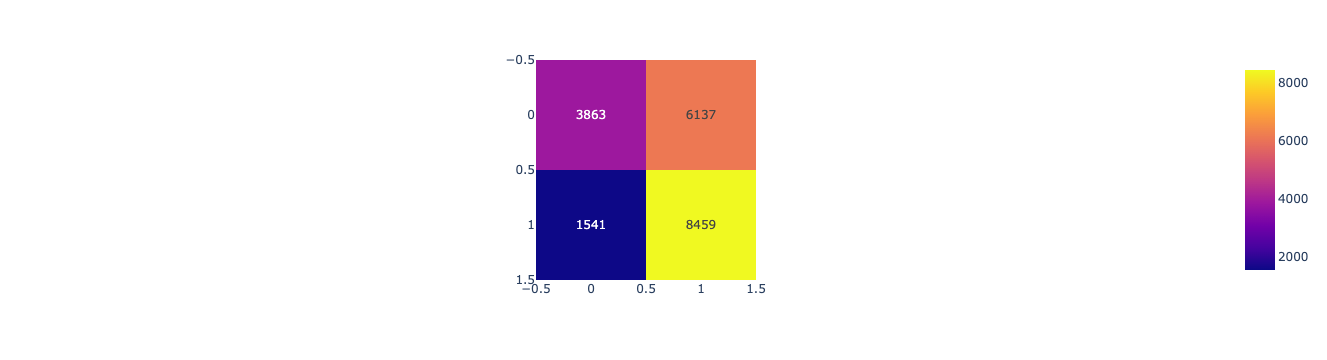

In [69]:
fig = px.imshow(tmp1[tmp1['mode'] == 'train'].iloc[0]['confusion_matrix.not_normalized'], text_auto=True)
fig.show()

In [45]:
print(stats_df[stats_df['epoch_index'] == stats_df['epoch_index'].max()].to_markdown())

|    |   accuracy | mode   |   epoch_index | label_layout.labels   | label_layout.label_indices   |   accuracy_details.number_of_correctly_classified |   accuracy_details.total_number_of_samples |   classification_report.0.precision |   classification_report.0.recall |   classification_report.0.f1-score |   classification_report.0.support |   classification_report.1.precision |   classification_report.1.recall |   classification_report.1.f1-score |   classification_report.1.support |   classification_report.accuracy |   classification_report.macro avg.precision |   classification_report.macro avg.recall |   classification_report.macro avg.f1-score |   classification_report.macro avg.support |   classification_report.weighted avg.precision |   classification_report.weighted avg.recall |   classification_report.weighted avg.f1-score |   classification_report.weighted avg.support | confusion_matrix.normalized.true   | confusion_matrix.normalized.pred   | confusion_matrix.normalized.all   

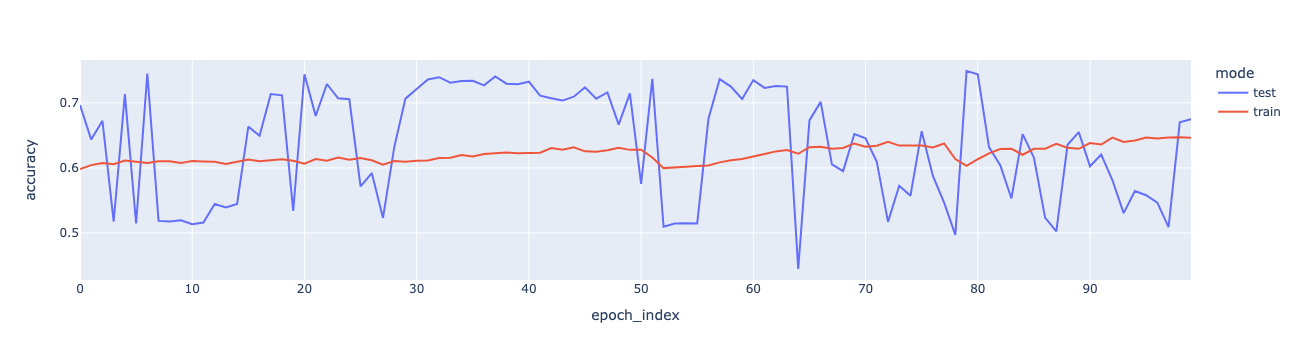

In [46]:
px.line(stats_df, x='epoch_index', y='accuracy', color='mode')

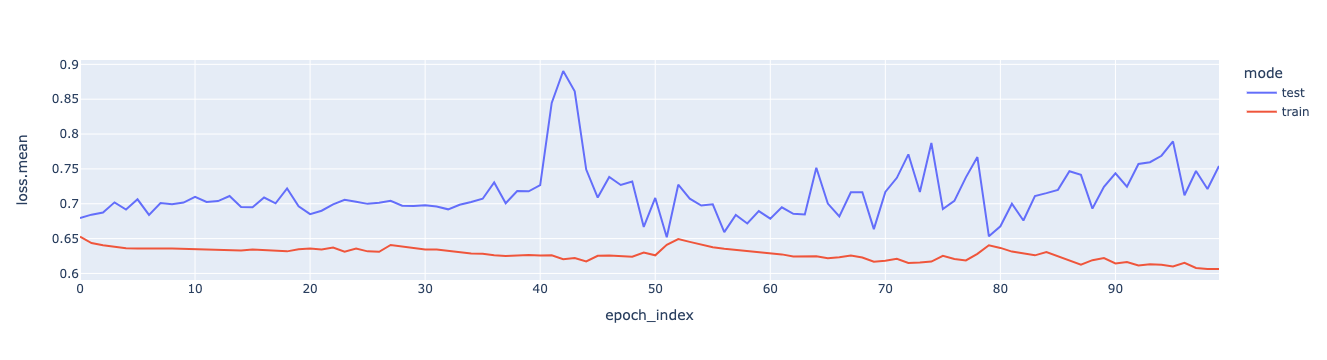

In [49]:
px.line(stats_df, x='epoch_index', y='loss.mean', color='mode')